In [ ]:
pip install tensorflow keras numpy pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Load metadata CSV file
data = pd.read_csv('HAM10000_metadata.csv')

# Load images and convert to numpy arrays
images = []
for i in range(len(data)):
    img_path = 'D:\ML/' + data['image_id'][i] + '.jpg'
    #print(img_path)
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img / 255.
    images.append(img)

# Convert labels to one-hot encoding
labels = pd.get_dummies(data['dx'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels.values, test_size=0.2, random_state=42)

In [ ]:
#ml and dl model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

# Train model
history = model.fit(np.array(X_train), y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_data=(np.array(X_test), y_test))


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
251/251 [==============================] - 500s 2s/step - loss: 1.0059 - accuracy: 0.6711 - val_loss: 0.9146 - val_accuracy: 0.6690
Epoch 2/20
251/251 [==============================] - 443s 2s/step - loss: 0.8809 - accuracy: 0.6857 - val_loss: 0.8797 - val_accuracy: 0.6820
Epoch 3/20
251/251 [==============================] - 438s 2s/step - loss: 0.8109 - accuracy: 0.7013 - val_loss: 0.8152 - val_accuracy: 0.7084
Epoch 4/20
251/251 [==============================] - 435s 2s/step - loss: 0.7569 - accuracy: 0.7178 - val_loss: 0.7658 - val_accuracy: 0.7254
Epoch 5/20
251/251 [==============================] - 438s 2s/step - loss: 0.7168 - accuracy: 0.7361 - val_loss: 0.7490 - val_accuracy: 0.7354
Epoch 6/20
251/251 [==============================] - 440s 2s/step - loss: 0.6870 - accuracy: 0.7466 - val_loss: 0.7388 - val_accuracy: 0.7334
Epoch 7/20
251/251 [==============================] - 436s 2s/step - loss: 0.6529 - accuracy: 0.7605 - val_loss: 0.7571 - val_accuracy: 0.7394

In [ ]:
#evaluvation and testing
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate model on test set
y_pred = model.predict(np.array(X_test))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
conf_mat = confusion_matrix(y_true, y_pred_classes)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
conf_mat = np.round(conf_mat, decimals=2)
print(conf_mat)


63/63 [==============================] - 27s 405ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35        69
           1       0.53      0.55      0.54        93
           2       0.54      0.38      0.45       228
           3       0.43      0.11      0.17        28
           4       0.41      0.50      0.46       226
           5       0.86      0.89      0.87      1338
           6       0.73      0.76      0.74        21

    accuracy                           0.74      2003
   macro avg       0.56      0.50      0.51      2003
weighted avg       0.73      0.74      0.73      2003

Confusion Matrix:
[[0.3  0.23 0.13 0.   0.14 0.19 0.  ]
 [0.05 0.55 0.09 0.01 0.11 0.17 0.02]
 [0.05 0.05 0.38 0.   0.18 0.33 0.  ]
 [0.07 0.29 0.07 0.11 0.   0.46 0.  ]
 [0.04 0.01 0.08 0.   0.5  0.36 0.  ]
 [0.   0.01 0.03 0.   0.07 0.89 0.  ]
 [0.   0.05 0.   0.   0.1  0.1  0.76]]


Text(0, 0.5, 'Fraction of incorrect predictions')

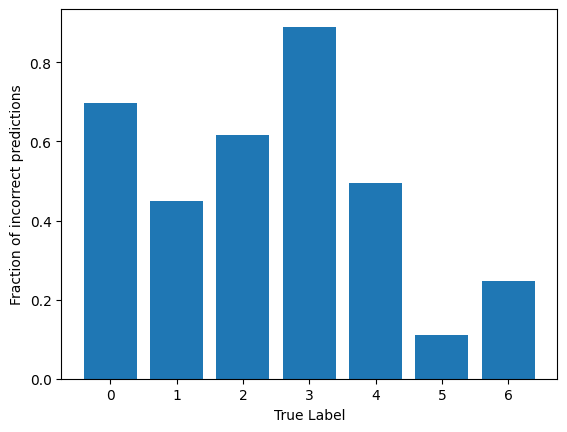

In [ ]:
#PLot fractional incorrect misclassifications
import matplotlib.pyplot as plt
incorr_fraction = 1 - np.diag(conf_mat) / np.sum(conf_mat, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')


Text(0, 0.5, 'Fraction of correct predictions')

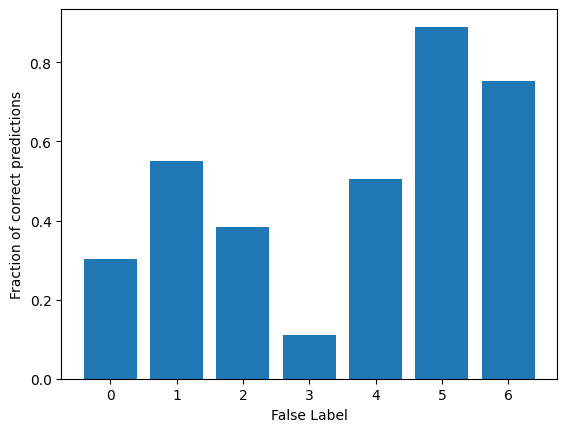

In [ ]:
#PLot fractional correct misclassifications
corr_fraction = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
plt.bar(np.arange(7), corr_fraction)
plt.xlabel('False Label')
plt.ylabel('Fraction of correct predictions')

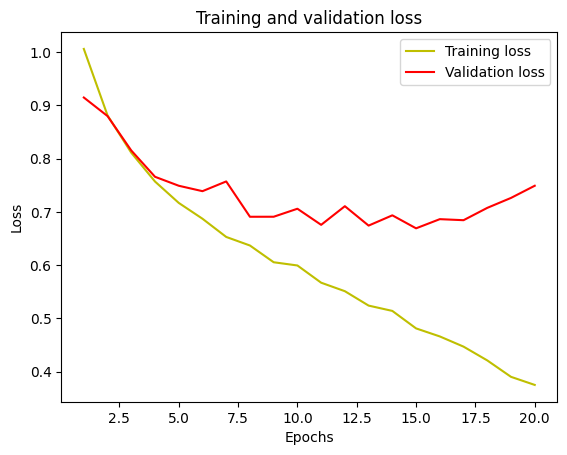

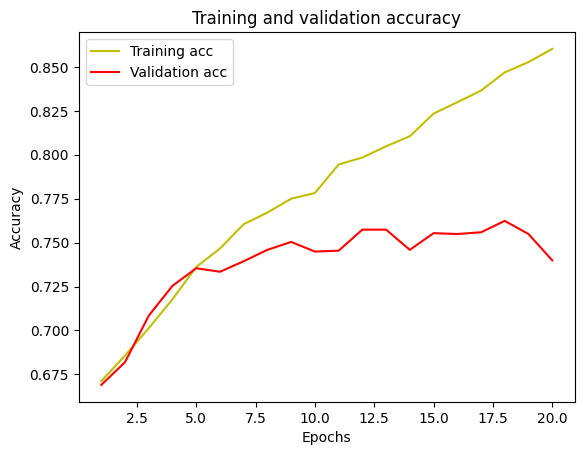

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Save the model to a file
model.save('my_model.h5')


In [ ]:
# Assuming you have trained and saved your model already
# Load the model
from keras.models import load_model
model = load_model('my_model.h5')

# Load your test image and preprocess it
from tensorflow.keras.utils import load_img, img_to_array
test_image = load_img('D:\ML\ISIC_0034313.jpg', target_size=(224, 224))
test_image = img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
predicted_class = model.predict(test_image)

# Get the predicted class label
predicted_label = np.argmax(predicted_class)

# Print the predicted label
print("The predicted class label is:", predicted_label)
print(labels)

1/1 [==============================] - 0s 153ms/step
The predicted class label is: 4
       akiec    bcc    bkl     df    mel     nv   vasc
0      False  False   True  False  False  False  False
1      False  False   True  False  False  False  False
2      False  False   True  False  False  False  False
3      False  False   True  False  False  False  False
4      False  False   True  False  False  False  False
...      ...    ...    ...    ...    ...    ...    ...
10010   True  False  False  False  False  False  False
10011   True  False  False  False  False  False  False
10012   True  False  False  False  False  False  False
10013   True  False  False  False  False  False  False
10014  False  False  False  False   True  False  False

[10015 rows x 7 columns]
